<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/K_Means_Clustering_Housing_%2B_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [282]:
# Mounting the Drive
# from google.colab import drive
# drive.mount('/content/drive')

#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, homogeneity_completeness_v_measure, fowlkes_mallows_score

# K-Means Clustering - 2D

In [284]:
# read the house dataset
house = pd.read_csv('/content/drive/MyDrive/Colab Work/IIT KGP AI Certification/Dataset/IIT KGP AI - W6 - Housing/housing.csv')
house.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [285]:
# read the wine dataset
cols = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
'Hue', 'OD280/OD315', 'Proline']
wine = pd.read_csv('/content/drive/MyDrive/Colab Work/IIT KGP AI Certification/Dataset/IIT KGP AI - W6 - Wine/wine.csv',names = cols)
wine.head(2)

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [286]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [287]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                178 non-null    int64  
 1   Alcohol              178 non-null    float64
 2   MalicAcid            178 non-null    float64
 3   Ash                  178 non-null    float64
 4   AlcalinityOfAsh      178 non-null    float64
 5   Magnesium            178 non-null    int64  
 6   TotalPhenols         178 non-null    float64
 7   Flavanoids           178 non-null    float64
 8   NonflavanoidPhenols  178 non-null    float64
 9   Proanthocyanins      178 non-null    float64
 10  ColorIntensity       178 non-null    float64
 11  Hue                  178 non-null    float64
 12  OD280/OD315          178 non-null    float64
 13  Proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Principal Component Analysis -  Dimensionality Reduction

> If you have 9 features in your original data, PCA with n_components=2 will create a new representation of your data with only 2 features. These 2 features capture the most important variance in the original data.

In [288]:
# house
house_norm = (house-house.min())/(house.max()-house.min())
pca = PCA(n_components=2) #2-dimensional PCA
house_transformed = pd.DataFrame(pca.fit_transform(house_norm))
house_transformed

,0,1
0,0.267184,0.648987
1,0.252400,0.282721
2,0.328713,0.585428
3,0.341324,0.536940
4,0.350373,0.503616
...,...,...
20635,0.447789,-0.270524
20636,0.436279,-0.325650
20637,0.429064,-0.328828
20638,0.439350,-0.325415


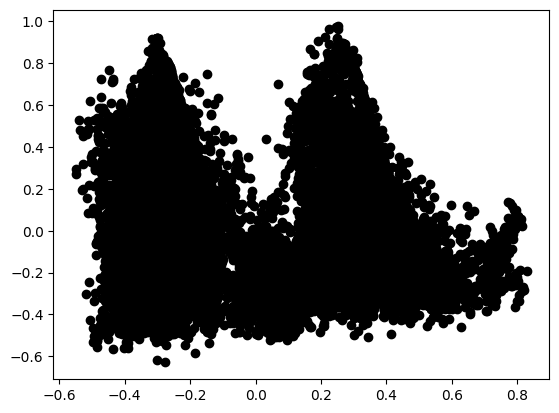

In [289]:
# house
x_house = house_transformed[0]
y_house = house_transformed[1]
plt.scatter(x_house,y_house,color = 'black')
plt.show()

In [290]:
#wine
wine.Class.unique()
X_wine = wine.drop('Class',axis=1)
Y_wine = wine['Class']

> wine dataset is classified in 3 diffferent class. So total cluster should be 3. Let's check in upcoming module Elbow method.

In [291]:
#wine
wine_norm = (X_wine-X_wine.min())/(X_wine.max()-X_wine.min())
pca = PCA(n_components=2) #2-dimensional PCA
wine_transformed = pd.DataFrame(pca.fit_transform(wine_norm))
wine_transformed

,0,1
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


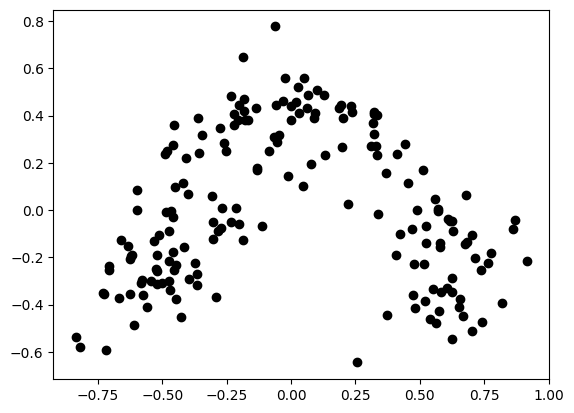

In [292]:
#wine
x_wine = wine_transformed[0]
y_wine = wine_transformed[1]
plt.scatter(x_wine,y_wine,color = 'black')
plt.show()

## The ELBOW method

> To determine the optimal number of clusters in cluster analysis, specifically in K-means clustering. No of cluster with  Mimimal error or WCSS - Within-Cluster Sum of Squares.

In [293]:
# calculating the error or wcss based on no of cluster
#house
house_data  = list(zip(x_house,y_house))
house_inertias = []
for i in range (1,11) :  # trying to find best cluster number between 1 to 11
  house_kmeans = KMeans(n_clusters = i, n_init = 'auto')
  house_kmeans.fit(house_data)
  house_inertias.append(house_kmeans.inertia_)
print(house_inertias)

[3272.150218780598, 1688.5159143481012, 1098.4849808738381, 763.6302569898584, 600.9090207835189, 483.88722765073027, 397.12116485232315, 345.7498798492185, 322.18921475499053, 281.7821882988492]


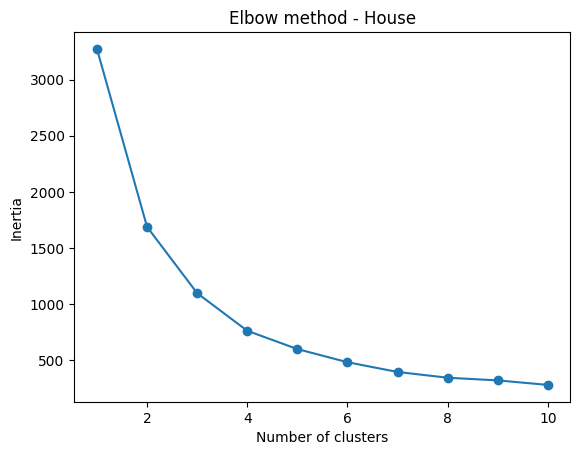

In [294]:
#house
plt.plot(range(1,11), house_inertias, marker='o')
plt.title('Elbow method - House')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- As per Eblow bend is coming at 2. Hence will use cluster = 2 and train the model.

In [295]:
# calculating the error or wcss based on no of cluster
#wine
wine_data  = list(zip(x_wine,y_wine))
wine_inertias = []
for i in range (1,11) :  # trying to find best cluster number between 1 to 11
  wine_kmeans = KMeans(n_clusters = i, n_init = 'auto')
  wine_kmeans.fit(wine_data)
  wine_inertias.append(wine_kmeans.inertia_)
print(wine_inertias)

[57.09188750571712, 26.14408895580789, 10.77176280410001, 9.208808422188598, 6.333672612895241, 5.162170423370207, 4.547093060796593, 4.246042222434352, 3.7018674563721565, 3.314198268095412]


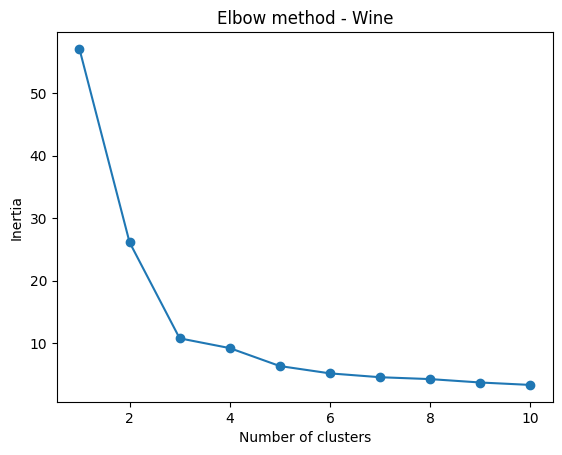

In [296]:
#house
plt.plot(range(1,11), wine_inertias, marker='o')
plt.title('Elbow method - Wine')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- As per Eblow bend is coming at 3. Hence will use cluster = 3 and train the model.

## K-Means Clustering Model

In [297]:
#house
house_kmeans = KMeans(n_clusters = 2, n_init = 'auto')
house_kmeans.fit(house_data)
house_cluster = house_kmeans.labels_
print(house_cluster)

[0 0 0 ... 0 0 0]


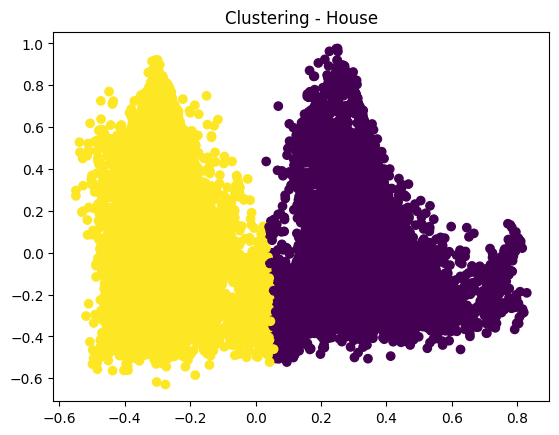

In [298]:
#visualizing the cluster - House
plt.scatter(x_house, y_house, c=house_kmeans.labels_)
plt.title('Clustering - House')
plt.show()

In [299]:
#house
wine_kmeans = KMeans(n_clusters = 3, n_init = 'auto')
wine_kmeans.fit(wine_data)
wine_cluster = wine_kmeans.labels_
print(wine_cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 1 2 2 2 2 1 2 1
 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


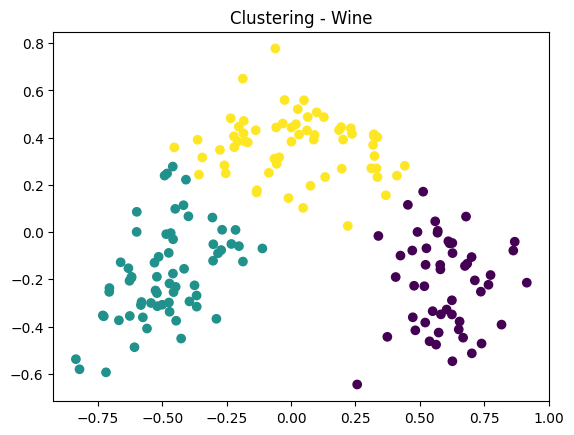

In [300]:
#visualizing the cluster - House
plt.scatter(x_wine, y_wine, c=wine_kmeans.labels_)
plt.title('Clustering - Wine')
plt.show()

## Score Machenism [Silhouette + Calinski-Harabasz + Davies-Bouldin ]

In [301]:
#  silhouette_score, calinski_harabasz_score, davies_bouldin_score
# without ground truth -- means clustering the dataset without any target variable. Just clustering.
def score_without_truth(data,cluster):
  score_without_house = pd.DataFrame( )
  score_without_house['metrics'] = ['Silhouette Score','Calinski-Harabasz Score','Davies-Bouldin Score']
  score_without_house['Score'] = [silhouette_score(data,cluster,metric='euclidean'),calinski_harabasz_score(data,cluster),davies_bouldin_score(data,cluster)]
  return score_without_house

In [302]:
# house
score_without_house = score_without_truth(house_data,house_cluster)
score_without_house

,metrics,Score
0,Silhouette Score,0.488665
1,Calinski-Harabasz Score,19356.126198
2,Davies-Bouldin Score,0.860224


## Score Machenism [Rand +Mutual Information  + Homogeneity, completeness and V-measure + Fowlkes-Mallows]

In [303]:
# Rand ,Mutual Information , Homogeneity, completeness and V-measure , Fowlkes-Mallows
# with ground truth -- means clustering the dataset with respective to  target variable.
def score_with_truth(labels_true,labels_pred):
  #print('homogeneity_completeness_v_measure :' , homogeneity_completeness_v_measure(labels_true,labels_pred))
  score_with_wine = pd.DataFrame()
  score_with_wine['metrics'] = ['Rand Score','Adjusted Rand Score','Mutual Information Score','Adjusted Mutual Information Score','Homogeneity Score','Completeness Score','V-measure Score','Fowlkes-Mallows Score']
  score_with_wine['Score'] = [rand_score(labels_true,labels_pred),adjusted_rand_score(labels_true,labels_pred),mutual_info_score(labels_true,labels_pred),
                              mutual_info_score(labels_true,labels_pred),homogeneity_score(labels_true,labels_pred),completeness_score(labels_true,labels_pred),
                              v_measure_score(labels_true,labels_pred),fowlkes_mallows_score(labels_true,labels_pred)]
  return score_with_wine

In [304]:
#wine
labels_true = Y_wine
labels_pred = wine_cluster
score_with_wine = score_with_truth(labels_true,labels_pred)
score_with_wine

,metrics,Score
0,Rand Score,0.931823
1,Adjusted Rand Score,0.847097
2,Mutual Information Score,0.909524
3,Adjusted Mutual Information Score,0.909524
4,Homogeneity Score,0.837470
5,Completeness Score,0.831867
6,V-measure Score,0.834659
7,Fowlkes-Mallows Score,0.898416


# K-Means Clustering - Data with Higher-Dimensions

In [305]:
# 3D
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
z = [15, 18, 22, 21, 21, 19, 15, 16, 16, 17]

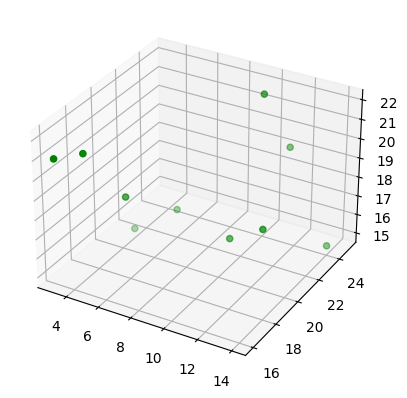

In [306]:
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "green")
plt.show()

## The ELBOW method

In [307]:
data = list(zip(x,y,z))
inertias = []
for i in range (1,11) :  # trying to find best cluster number between 1 to 11
  kmeans = KMeans(n_clusters = i, n_init = 'auto')
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)
print(inertias)

[280.90000000000003, 117.99999999999999, 83.5, 37.166666666666664, 20.333333333333332, 12.0, 6.5, 3.5, 1.0, 0.0]


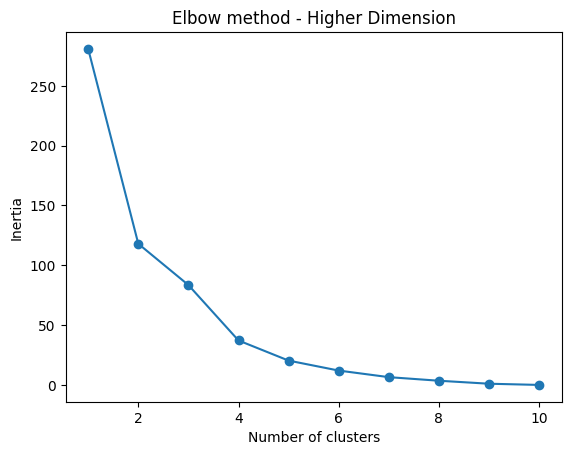

In [308]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method - Higher Dimension')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- As per Eblow bend is coming at 4. Hence will use cluster = 4 and train the model.

## K-Means Clustering Model

In [309]:
#modelling
kmeans = KMeans(n_clusters = 4, n_init = 'auto')
kmeans.fit(data)
cluster = kmeans.labels_
print(cluster)

[2 2 3 0 0 3 1 2 1 1]


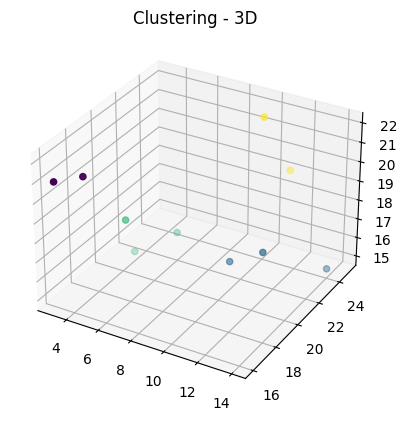

In [310]:
#visualizing the cluster - 3d
ax1 = plt.axes(projection ="3d")
ax1.scatter3D(x, y, z, c=kmeans.labels_)
plt.title('Clustering - 3D')
plt.show()

## Score Machenism [Silhouette + Calinski-Harabasz + Davies-Bouldin ]

In [311]:
#Score
score_3D = score_without_truth(data,cluster)
score_3D

,metrics,Score
0,Silhouette Score,0.463747
1,Calinski-Harabasz Score,14.604926
2,Davies-Bouldin Score,0.608325
